### The capstone project

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

path = 'D:/Downloads/'

### Load the IMDB dataset from the folder

In [2]:
def load_imdb_dataset(path):
    imdb_path = os.path.join(path, 'aclImdb')

    # Load the dataset
    train_texts = []
    train_labels = []
    test_texts = []
    test_labels = []
    for dset in ['train', 'test']:
        for cat in ['pos', 'neg']:
            dset_path = os.path.join(imdb_path, dset, cat)
            for fname in sorted(os.listdir(dset_path)):
                if fname.endswith('.txt'):
                    with open(os.path.join(dset_path, fname)) as f:
                        if dset == 'train': train_texts.append(f.read())
                        else: test_texts.append(f.read())
                    label = 0 if cat == 'neg' else 1
                    if dset == 'train': train_labels.append(label)
                    else: test_labels.append(label)

    # Converting to np.array
    train_texts = np.array(train_texts)
    train_labels = np.array(train_labels)
    test_texts = np.array(test_texts)
    test_labels = np.array(test_labels)

  
    train_df = pd.DataFrame({'Review':train_texts , 'Label': train_labels})
    test_df=pd.DataFrame({'Review':test_texts , 'Label': test_labels})
    # Return the dataset
    return train_df,test_df

### Create a train and test respectively

In [3]:
train_df,test_df= load_imdb_dataset(path)


In [4]:
train_df.head()

,Label,Review
0,1,Bromwell High is a cartoon comedy. It ran at t...
1,1,Homelessness (or Houselessness as George Carli...
2,1,Brilliant over-acting by Lesley Ann Warren. Be...
3,1,This is easily the most underrated film inn th...
4,1,This is not the typical Mel Brooks film. It wa...


In [5]:
df=train_df

### Removig all the punctuation and '\' symbols

In [6]:
df['Review'] = df['Review'].str.lower().str.replace('[^a-z]', ' ')
df['Review'] = df['Review'].str.lower().str.replace('[^\w\s]',' ')
df['Review'] = df['Review'].str.lower().str.replace(r'<.*?>',' ')
df['Review'] = df['Review'].str.lower().str.replace(' br ',' ')
df.head()

,Label,Review
0,1,bromwell high is a cartoon comedy it ran at t...
1,1,homelessness or houselessness as george carli...
2,1,brilliant over acting by lesley ann warren be...
3,1,this is easily the most underrated film inn th...
4,1,this is not the typical mel brooks film it wa...


In [7]:
df=test_df

In [8]:
df['Review'] = df['Review'].str.lower().str.replace('[^a-z]', ' ')
df['Review'] = df['Review'].str.lower().str.replace('[^\w\s]',' ')
df['Review'] = df['Review'].str.lower().str.replace(r'<.*?>',' ')
df['Review'] = df['Review'].str.lower().str.replace(' br ',' ')
df.head()

,Label,Review
0,1,i went and saw this movie last night after bei...
1,1,actor turned director bill paxton follows up h...
2,1,as a recreational golfer with some knowledge o...
3,1,i saw this film in a sneak preview and it is ...
4,1,bill paxton has taken the true story of the ...


In [9]:
test_df.head()

,Label,Review
0,1,i went and saw this movie last night after bei...
1,1,actor turned director bill paxton follows up h...
2,1,as a recreational golfer with some knowledge o...
3,1,i saw this film in a sneak preview and it is ...
4,1,bill paxton has taken the true story of the ...


### For train data

### Removing stopwords

In [10]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
df=train_df
df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


In [14]:
df.head()

,Label,Review
0,1,bromwell high cartoon comedy ran time programs...
1,1,homelessness houselessness george carlin state...
2,1,brilliant acting lesley ann warren best dramat...
3,1,easily underrated film inn brooks cannon sure ...
4,1,typical mel brooks film much less slapstick mo...


In [15]:
misc=['film','movie','time','story','character','get','see']

In [16]:
df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in misc))

### Stemming

In [17]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()


In [18]:
df['Review'] = df['Review'].apply(lambda x: " ".join(ps.stem(word) for word in x.split()))

In [19]:
df.head()

,Label,Review
0,1,bromwel high cartoon comedi ran program school...
1,1,homeless houseless georg carlin state issu yea...
2,1,brilliant act lesley ann warren best dramat ho...
3,1,easili underr inn brook cannon sure flaw give ...
4,1,typic mel brook much less slapstick movi actua...


In [12]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Lemmatization

In [20]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
df['Review'] = df['Review'].apply(lambda x: " ".join(wordnet_lemmatizer.lemmatize(word) for word in x.split()))

In [21]:
df.head()

,Label,Review
0,1,bromwel high cartoon comedi ran program school...
1,1,homeless houseless georg carlin state issu yea...
2,1,brilliant act lesley ann warren best dramat ho...
3,1,easili underr inn brook cannon sure flaw give ...
4,1,typic mel brook much le slapstick movi actual ...


### For test data

In [22]:
df=test_df

In [23]:
df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in misc))
df['Review'] = df['Review'].apply(lambda x: " ".join(ps.stem(word) for word in x.split()))
df['Review'] = df['Review'].apply(lambda x: " ".join(wordnet_lemmatizer.lemmatize(word) for word in x.split()))
df.head()

,Label,Review
0,1,went saw last night coax friend mine admit rel...
1,1,actor turn director bill paxton follow promis ...
2,1,recreat golfer knowledg sport histori plea dis...
3,1,saw sneak preview delight cinematographi unusu...
4,1,bill paxton taken true u golf open made much e...


In [33]:
df=train_df

In [34]:
x_train = df.iloc[:, 1].values
y_train=df.iloc[:,0].values
df.head()

,Label,Review
0,1,bromwel high cartoon comedi ran program school...
1,1,homeless houseless georg carlin state issu yea...
2,1,brilliant act lesley ann warren best dramat ho...
3,1,easili underr inn brook cannon sure flaw give ...
4,1,typic mel brook much le slapstick movi actual ...


### Feature selection

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x_train=pd.DataFrame(cv.fit_transform(df.Review[:50]).toarray(), columns=cv.get_feature_names())

In [36]:
x_train.head()

,abandon,abduct,abil,abl,aboard,absolut,abus,abyss,academi,accept,...,yet,york,young,younger,youth,zane,zero,zest,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

### 4 best features are selected

In [38]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(x_train,y_train[:50])

### Important fetures are selected

In [39]:
features = fit.transform(x_train)
print(features[:,:])

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 1 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [1 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 1 0 1]
 [0 0 0 0]
 [0 0 0 0]]


In [40]:
mask = test.get_support() 
new_features = [] 
feature_names = list(x_train.columns.values)
for bool, feature in zip(mask, feature_names):
    if bool:
        new_features.append(feature)
dataframe = pd.DataFrame(features, columns=new_features)

In [41]:
dataframe.head()

,zero,zest,zone,zoom
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


### From the above table you can the k-best features for the first 50 Data values of the training set 

In [42]:
df.head()

,Label,Review
0,1,bromwel high cartoon comedi ran program school...
1,1,homeless houseless georg carlin state issu yea...
2,1,brilliant act lesley ann warren best dramat ho...
3,1,easili underr inn brook cannon sure flaw give ...
4,1,typic mel brook much le slapstick movi actual ...


In [60]:
pos=df[df.Label==1]
neg=df[df.Label==0]

In [44]:
pos.head()

,Label,Review
0,1,bromwel high cartoon comedi ran program school...
1,1,homeless houseless georg carlin state issu yea...
2,1,brilliant act lesley ann warren best dramat ho...
3,1,easili underr inn brook cannon sure flaw give ...
4,1,typic mel brook much le slapstick movi actual ...


In [45]:
neg.head()

,Label,Review
12500,0,man unnatur feel pig start open scene terrif e...
12501,0,airport start brand new luxuri plane load valu...
12502,0,lack someth put finger first charisma part lea...
12503,0,sorri everyon know suppos art wow hand gun scr...
12504,0,littl parent took along theater interior one m...


In [46]:
freq = pd.Series(' '.join(pos['Review']).split()).value_counts()[:10]

### The most common/Highest frquency words in positive reviews

In [47]:
freq

one      14173
like     10463
good      7843
make      6969
well      6709
watch     6554
great     6490
love      6168
show      5592
also      5551
dtype: int64

In [48]:
freq = pd.Series(' '.join(neg['Review']).split()).value_counts()[:10]

### The most common/Highest frequency words in negative reviews

In [49]:
freq

one       13576
like      12343
make       8243
even       7795
good       7524
bad        7437
watch      7391
would      7036
realli     6263
look       5875
dtype: int64

### The most lowest frquency words in positive reviews

In [50]:
freq = pd.Series(' '.join(pos['Review']).split()).value_counts()[-10:]

In [51]:
freq

puller         1
rosenkavali    1
fm             1
penlight       1
saidism        1
antipathi      1
uncolour       1
cleancut       1
bolvian        1
shiktak        1
dtype: int64

### The most lowest frquency words in negative reviews

In [52]:
freq = pd.Series(' '.join(neg['Review']).split()).value_counts()[-10:]
freq

amati         1
awarde        1
tomer         1
palimpsest    1
marietta      1
stepdaught    1
piledriv      1
magaret       1
millican      1
crutchley     1
dtype: int64

### Loading unsupervised learning dataset

In [42]:
def load_imdb_dataset(path):
    imdb_path = os.path.join(path, 'aclImdb')

    # Load the dataset
    train_texts = []
    train_labels = []
    test_texts = []
    test_labels = []
    

    for dset in ['train']:
        dset_path = os.path.join(imdb_path, dset, 'unsup')
        for fname in sorted(os.listdir(dset_path)):
            if fname.endswith('.txt'):
                    with open(os.path.join(dset_path, fname)) as f:
                        if dset == 'train': train_texts.append(f.read())
                        else: test_texts.append(f.read())
    
    # Converting to np.array
    train_texts = np.array(train_texts)
  
    train_df_un = pd.DataFrame({'Review':train_texts })
   
    # Return the dataset
    return train_df_un

In [43]:
train_df_un= load_imdb_dataset(path)

In [164]:
train_df_un.head()

,Review
0,"I admit, the great majority of films released ..."
1,"Take a low budget, inexperienced actors doubli..."
2,"Everybody has seen 'Back To The Future,' right..."
3,Doris Day was an icon of beauty in singing and...
4,"After a series of silly, fun-loving movies, 19..."


In [44]:
df=train_df_un
df['Review'] = df['Review'].str.lower().str.replace('[^a-z]', ' ')
df['Review'] = df['Review'].str.lower().str.replace('[^\w\s]',' ')
df['Review'] = df['Review'].str.lower().str.replace(r'<.*?>',' ')
df['Review'] = df['Review'].str.lower().str.replace(' br ',' ')
df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Review'] = df['Review'].apply(lambda x: " ".join(ps.stem(word) for word in x.split()))
df['Review'] = df['Review'].apply(lambda x: " ".join(wordnet_lemmatizer.lemmatize(word) for word in x.split()))
df.head()

,Review
0,admit great major film releas say dozen major ...
1,take low budget inexperienc actor doubl produc...
2,everybodi seen back futur right whether like m...
3,dori day icon beauti sing act warm voic geniu ...
4,seri silli fun love movi big year dori day yea...


### Vectorising the dataset

In [208]:
data=train_df_un

cv = CountVectorizer()


In [209]:
X=vectorizer.fit_transform(data.Review[:50]).toarray()

In [210]:
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.06349166, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### Clustering the data

In [234]:
from sklearn.cluster import KMeans
 
kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++', max_iter=100, n_init=1)
kmeans.fit(X)
kmeans.labels_
kmeans.cluster_centers_  

array([[ 1.41918238e-02,  0.00000000e+00,  0.00000000e+00, ...,
         6.18137790e-02,  4.60300170e-02,  1.69663086e-02],
       [ 4.10141157e-03,  5.80269062e-03,  1.38025350e-03, ...,
        -5.20417043e-18,  3.26049700e-03, -1.08420217e-18]])

In [235]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1])

Text(0.5,1,u'KMeans clusters')

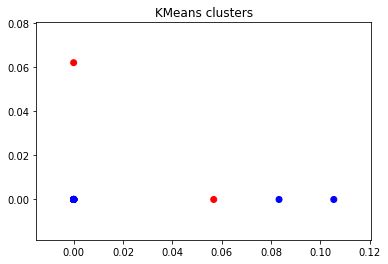

In [236]:
colors = ['red', 'blue']
pred_colors = [colors[label] for label in kmeans.labels_]

plt.scatter(X[:,0], X[:,200], c=pred_colors)
plt.title('KMeans clusters')

### Wordcloud for positive words

In [53]:
from wordcloud import WordCloud

In [54]:
pos_list=pos['Review'].unique().tolist()

In [55]:
pos = " ".join(pos_list)

In [56]:
pos_wordcloud = WordCloud().generate(pos)

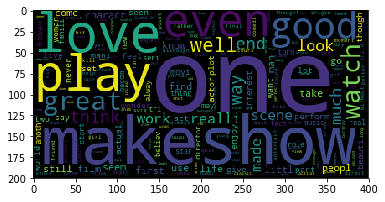

In [57]:
plt.figure()
plt.imshow(pos_wordcloud)
plt.show()

### Wordcloud for negative reviews

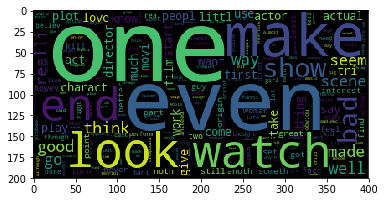

In [58]:
neg_list=neg['Review'].unique().tolist()
neg = " ".join(neg_list)
neg_wordcloud = WordCloud().generate(neg)
plt.figure()
plt.imshow(neg_wordcloud)
plt.show()

### Positive words distribution

In [61]:
freq = pd.Series(' '.join(pos['Review']).split()).value_counts()[:10]

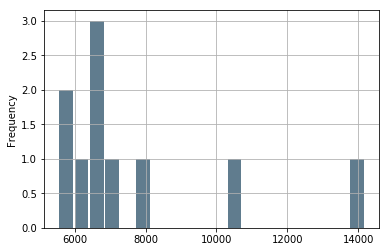

In [62]:
freq.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')

In [63]:
freq=pd.DataFrame(freq)
freq.columns=['count']

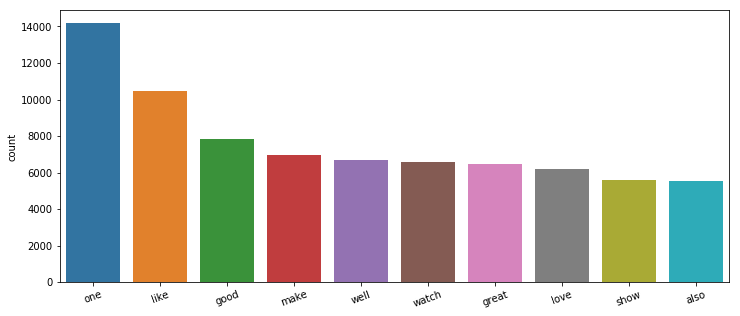

In [64]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x =freq.index, y = 'count', data = freq)
plt.xticks(rotation=20);

### Negative words distribution

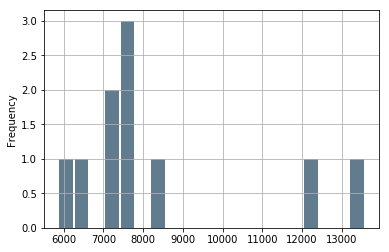

In [65]:
freq = pd.Series(' '.join(neg['Review']).split()).value_counts()[:10]
freq.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')

In [68]:
freq=pd.DataFrame(freq)
freq.columns=['count']

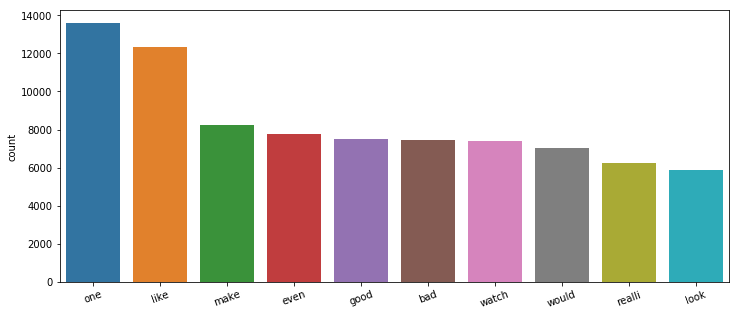

In [69]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x =freq.index, y = 'count', data = freq)
plt.xticks(rotation=20);

### Repeatition of above steps after feature selection

### Positive cloud

In [70]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x_train=pd.DataFrame(cv.fit_transform(pos.Review[:50]).toarray(), columns=cv.get_feature_names())

test = SelectKBest(score_func=chi2, k=100)
fit = test.fit(x_train,y_train[:50])
features = fit.transform(x_train)
mask = test.get_support() 
new_features = [] 
feature_names = list(x_train.columns.values)
for bool, feature in zip(mask, feature_names):
    if bool:
        new_features.append(feature)


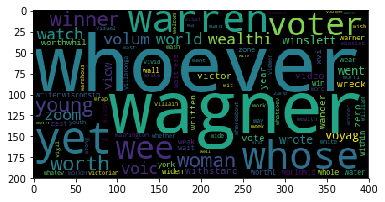

In [71]:
pos_feat = " ".join(new_features)
pos_aft_wordcloud = WordCloud().generate(pos_feat)
plt.figure()
plt.imshow(pos_aft_wordcloud)
plt.show()

### Negative word cloud

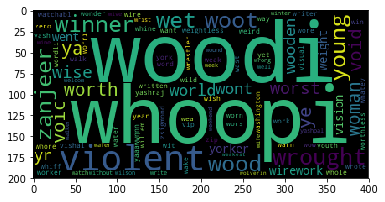

In [72]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x_train=pd.DataFrame(cv.fit_transform(neg.Review[:50]).toarray(), columns=cv.get_feature_names())

test = SelectKBest(score_func=chi2, k=100)
fit = test.fit(x_train,y_train[:50])
features = fit.transform(x_train)
mask = test.get_support() 
new_features = [] 
feature_names = list(x_train.columns.values)
for bool, feature in zip(mask, feature_names):
    if bool:
        new_features.append(feature)
        
neg_feat = " ".join(new_features)
neg_aft_wordcloud = WordCloud().generate(neg_feat)
plt.figure()
plt.imshow(neg_aft_wordcloud)
plt.show()

### Phase 4

In [124]:
df=train_df

In [125]:
df.head()

,Label,Review
21724,0,usa azn tv purcha right film network show use ...
14355,0,intellig summari mad max someth simpl straight...
5639,1,view origin outer limit real time first broadc...
5560,1,thank help fellow imdb member manag watch film...
10959,1,select quinzain de r alisateur year catherin b...


### The above is training set

#### Jumble the datasets

In [16]:
df=df.sample(frac=1)
df.head()

,Label,Review
21724,0,usa azn tv purcha right film network show use ...
14355,0,intellig summari mad max someth simpl straight...
5639,1,view origin outer limit real time first broadc...
5560,1,thank help fellow imdb member manag watch film...
10959,1,select quinzain de r alisateur year catherin b...


In [17]:
train_df=df

In [18]:
train_df.head()

,Label,Review
21724,0,usa azn tv purcha right film network show use ...
14355,0,intellig summari mad max someth simpl straight...
5639,1,view origin outer limit real time first broadc...
5560,1,thank help fellow imdb member manag watch film...
10959,1,select quinzain de r alisateur year catherin b...


###  For Test data

In [19]:
df=test_df
df=df.sample(frac=1)
df.head()

,Label,Review
2436,1,littl book half charact elimin plot greatli al...
14560,0,reason question mark parenthesi seen everi fil...
288,1,great danger watch film profound affect first ...
9366,1,cannot see movi grow franc spent least year li...
6600,1,great memori watch robin sherwood tv kid think...


In [20]:
test_df=df

In [21]:
test_df.head()

,Label,Review
2436,1,littl book half charact elimin plot greatli al...
14560,0,reason question mark parenthesi seen everi fil...
288,1,great danger watch film profound affect first ...
9366,1,cannot see movi grow franc spent least year li...
6600,1,great memori watch robin sherwood tv kid think...


In [33]:
results=[]
names=[]

### Initialize tfidvectorizer for feature extraction

In [126]:
tfidf = TfidfVectorizer(stop_words ='english', smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word')

In [127]:
x_train = tfidf.fit_transform(train_df.Review) 
x_test  = tfidf.transform(test_df.Review)

In [128]:
y_train = train_df.Label
y_test = test_df.Label

### Naive bayes

In [129]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
results.append(accuracy)
names.append("Naive bayes")
accuracy


0.93972

#### Logistic Regression

In [130]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(penalty='l2',C=.00001)
log.fit(x_train,y_train)
y_pred = log.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
results.append(accuracy)
names.append("Log Regression")
accuracy


0.8642

#### K-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=2)
knn_clf.fit(x_train, y_train)
predictions = knn_clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
results.append(accuracy)
names.append("K-NN")
accuracies


### random forest

In [131]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10,oob_score=True ,random_state =42, min_samples_split=25)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
results.append(accuracy)
names.append("Random Forest")
accuracy


0.97536

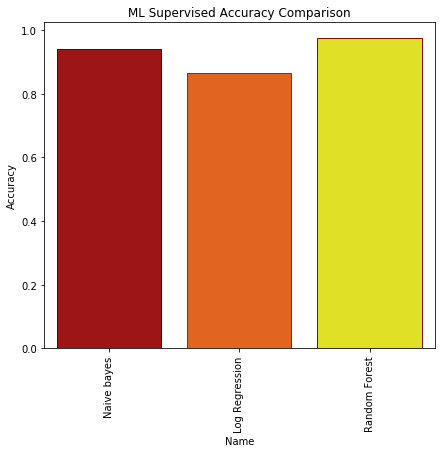

In [40]:
comp=pd.DataFrame({'Name':names , 'Accuracy': results})
plt.subplots(figsize=(7,6))
sns.barplot(x="Name", y="Accuracy",data=comp,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('ML Supervised Accuracy Comparison')
plt.show()

In [422]:
names

['Naive bayes', 'Log Regression', 'SVM', 'K-NN', 'Random Forest']

## Unsupervised learning

### K-means

In [362]:
X=df.Review
y=df.Label[:50]
X=pd.DataFrame(X)
X=vectorizer.fit_transform(data.Review[:50]).toarray()

In [45]:
train_df_un.head()

,Review
0,admit great major film releas say dozen major ...
1,take low budget inexperienc actor doubl produc...
2,everybodi seen back futur right whether like m...
3,dori day icon beauti sing act warm voic geniu ...
4,seri silli fun love movi big year dori day yea...


In [62]:
tfidf = TfidfVectorizer(stop_words ='english', smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word')
X = tfidf.fit_transform(train_df_un.Review) 
train_df_un.head()

,Review
0,admit great major film releas say dozen major ...
1,take low budget inexperienc actor doubl produc...
2,everybodi seen back futur right whether like m...
3,dori day icon beauti sing act warm voic geniu ...
4,seri silli fun love movi big year dori day yea...


In [74]:
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(train_df_un.Review[:100]).toarray()

### Predicted Clusters

Text(0.5,1,u'KMeans clusters')

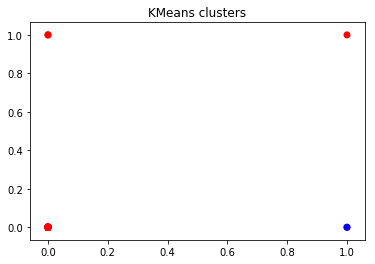

In [79]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++', max_iter=100, n_init=1)
kmeans.fit(X)
kmeans.labels_
kmeans.cluster_centers_  
colors = ['red', 'blue']
pred_colors = [colors[label] for label in kmeans.labels_]
#actual_colors = [colors[label] for label in y]
plt.scatter(X[:,0], X[:,500], c=pred_colors)
plt.title('KMeans clusters')

### Comapring the performance of k-means clusters for first 11 clusters

Text(0,0.5,u'wcss')

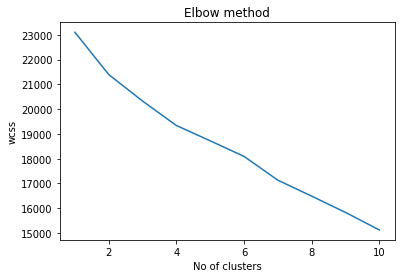

In [87]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) 
    
plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('wcss')

### Heirachical Clustering-Agglomerative

Text(0.5,1,u'Hierarchical clustering')

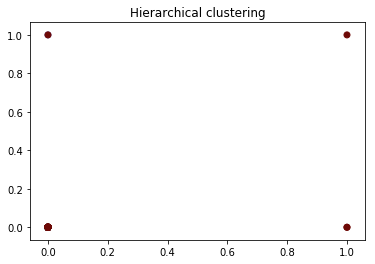

In [92]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = 2
ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
ward.fit(X)
colors =np.random.rand(n_clusters, 3)
pred_colors = [colors[label] for label in ward.labels_]

plt.scatter(X[:, 0],X[:, 500],c=pred_colors)
plt.title('Hierarchical clustering')

Text(0.5,1,u'Hierarchical clustering')

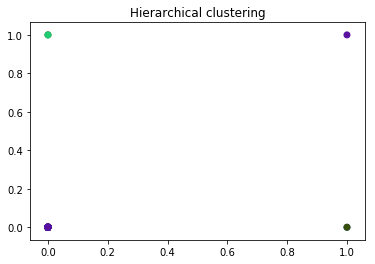

In [135]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = 4
ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
ward.fit(X)
colors =np.random.rand(n_clusters, 3)
pred_colors = [colors[label] for label in ward.labels_]

plt.scatter(X[:, 500],X[:, 0],c=pred_colors)
plt.title('Hierarchical clustering')

In [136]:
ward.labels_

array([2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0,
       1, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 1, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)